# Tennis Ace

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 1. Load and investigate the data.

### Identifying Data

* Player: name of the tennis player
* Year: year data was recorded

### Service Game Columns (Offensive)
* Aces: number of serves by the player where the receiver does not touch the ball
* DoubleFaults: number of times player missed both first and second serve attempts
* FirstServe: % of first-serve attempts made
* FirstServePointsWon: % of first-serve attempt points won by the player
* SecondServePointsWon: % of second-serve attempt points won by the player
* BreakPointsFaced: number of times where the receiver could have won service game of the player
* BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
* ServiceGamesPlayed: total number of games where the player served
* ServiceGamesWon: total number of games where the player served and won
* TotalServicePointsWon: % of points in games where the player served that they won
### Return Game Columns (Defensive)
* FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
* SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
* BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
* BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
* ReturnGamesPlayed: total number of games where the player’s opponent served
* ReturnGamesWon: total number of games where the player’s opponent served and the player won
* ReturnPointsWon: total number of points where the player’s opponent served and the player won
* TotalPointsWon: % of points won by the player

### Outcomes
* Wins: number of matches won in a year
* Losses: number of matches lost in a year
* Winnings: total winnings in USD in a year
* Ranking: ranking at the end of year

In [4]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


## 2. Exploratory Analysis

In [5]:
df.groupby('Year').Player.count()

Year
2009    110
2010    140
2011    159
2012    167
2013    197
2014    210
2015    227
2016    250
2017    261
Name: Player, dtype: int64

In [9]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


In [8]:
outcomes = ['Wins','Losses','Winnings','Ranking']
df.corr()[outcomes].sort_values(by='Winnings',ascending=False)

,Wins,Losses,Winnings,Ranking
Winnings,0.913297,0.869277,1.000000,-0.359835
Wins,1.000000,0.878732,0.913297,-0.287018
ServiceGamesPlayed,0.929153,0.935182,0.912985,-0.331738
ReturnGamesPlayed,0.928408,0.936755,0.912613,-0.331478
BreakPointsOpportunities,0.923453,0.909295,0.900444,-0.334548
BreakPointsFaced,0.883470,0.943309,0.876036,-0.322082
Losses,0.878732,1.000000,0.869277,-0.300614
DoubleFaults,0.847459,0.881922,0.854685,-0.305866
Aces,0.825301,0.768628,0.798404,-0.277811
TotalPointsWon,0.459368,0.428543,0.461061,-0.272007


In [6]:
perc = ['FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'BreakPointsConverted',
       'BreakPointsSaved','TotalServicePointsWon', 'TotalPointsWon']

In [9]:
df.corr().loc[perc,outcomes].sort_values(by='Winnings',ascending=False)

,Wins,Losses,Winnings,Ranking
TotalPointsWon,0.459368,0.428543,0.461061,-0.272007
TotalServicePointsWon,0.399270,0.371283,0.407707,-0.208355
FirstServePointsWon,0.356702,0.330581,0.361121,-0.150004
SecondServePointsWon,0.268979,0.250918,0.281215,-0.181013
BreakPointsSaved,0.252053,0.246990,0.258271,-0.121220
FirstServeReturnPointsWon,0.256029,0.243278,0.240808,-0.178664
SecondServeReturnPointsWon,0.193093,0.185217,0.199401,-0.159592
BreakPointsConverted,0.076989,0.062297,0.075022,-0.051005
FirstServe,0.064832,0.053736,0.057882,-0.068759


In [10]:
def plot_feature(feature, outcome, invert=False):
    x, y = df.loc[:,feature], df.loc[:,outcome]
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(x, y, alpha=0.1)
    ax.set(xlabel=feature, ylabel=outcome, title=f'{feature} vs. {outcome}')
    if invert:
        ax.invert_yaxis()
    return ax

<AxesSubplot:title={'center':'BreakPointsFaced vs. Losses'}, xlabel='BreakPointsFaced', ylabel='Losses'>

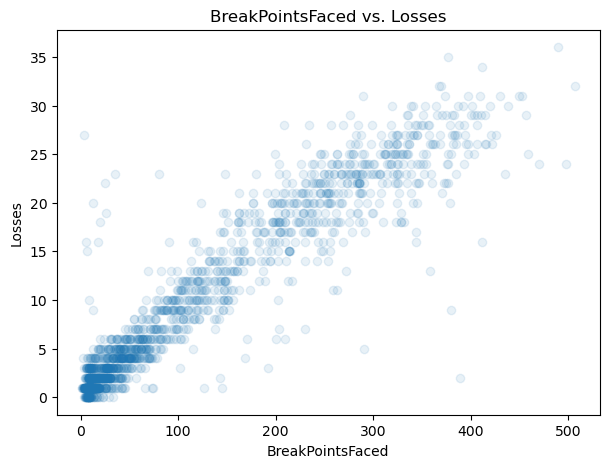

In [11]:
plot_feature('BreakPointsFaced','Losses')

<AxesSubplot:title={'center':'BreakPointsOpportunities vs. Wins'}, xlabel='BreakPointsOpportunities', ylabel='Wins'>

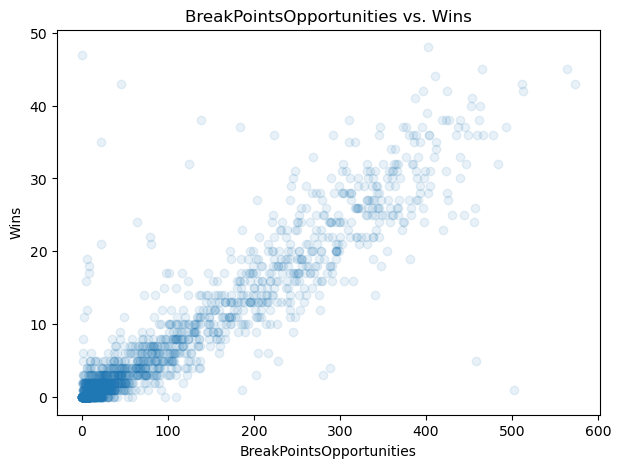

In [12]:
plot_feature('BreakPointsOpportunities','Wins')

## 3. Single feature linear regressions

In [13]:
x = np.array(df.BreakPointsOpportunities).reshape(-1,1)
y = np.array(df.Wins).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
print(f"coef: {lr.coef_} intercept: {lr.intercept_}")
print(f"train score: {lr.score(x_train, y_train)}")
print(f"test score: {lr.score(x_test, y_test)}")

coef: [[0.0772775]] intercept: [-0.05326681]
train score: 0.8621872232075228
test score: 0.8225252008139037


In [14]:
x_model = [0, max(x)[0]]
y_model = [x*lr.coef_[0,0] + lr.intercept_[0] for x in x_model]
print(x_model, y_model)

[0, 573] [-0.053266812013516684, 44.22674330969297]


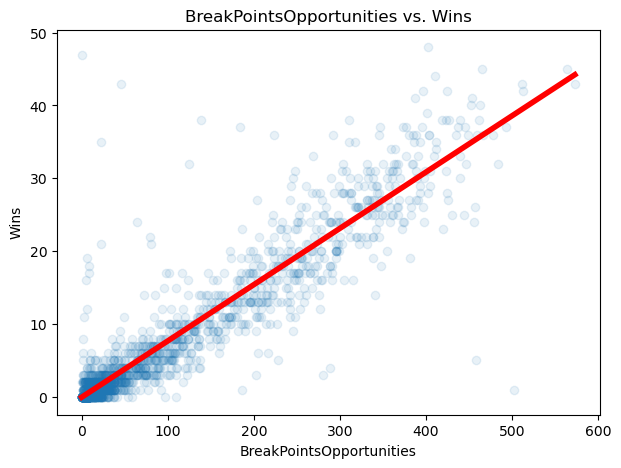

In [15]:
ax0 = plot_feature('BreakPointsOpportunities','Wins')
ax0.plot(x_model, y_model, color= 'red',linestyle='-',linewidth=4)

## 4. Two Feature Linear Regressions

In [16]:
features = list(df.columns)
to_remove = outcomes + ['DoubleFaults','Player', 'Year']
for col in to_remove:
    features.remove(col)
features.sort()

I am using the **scores** dictionary to record the scores of all groups of two features, in order to find out which group performs better.

In [22]:
scores = {(features[i], features[j]): 0 for i in range(len(features)-1) \
           for j in range( i+1, len(features))}

x = df[features]
y = np.array(df.Winnings).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
for couple in scores:
    #print(x_test[list(couple)].head(1))
    lr.fit(x_train[list(couple)], y_train)
    scores[couple] = round(lr.score(x_test[list(couple)], y_test),5)

In [23]:
df_two = pd.DataFrame.from_dict(scores,orient='index',columns=['score']).\
    sort_values(by='score',ascending=False)
df_two.head(10)

,score
"(ServiceGamesPlayed, TotalServicePointsWon)",0.82167
"(FirstServePointsWon, ServiceGamesPlayed)",0.82165
"(ServiceGamesPlayed, TotalPointsWon)",0.82164
"(ServiceGamesPlayed, ServiceGamesWon)",0.82156
"(Aces, ServiceGamesPlayed)",0.82154
"(ReturnGamesPlayed, ServiceGamesPlayed)",0.82132
"(SecondServePointsWon, ServiceGamesPlayed)",0.82132
"(SecondServeReturnPointsWon, ServiceGamesPlayed)",0.82122
"(Aces, ReturnGamesPlayed)",0.82122
"(BreakPointsSaved, ServiceGamesPlayed)",0.82120


The best score is provided by the couple of features: 'ServiceGamesPlayed', 'TotalServicePointsWon'.


Now we can also check the worst performing couples of features.

In [24]:
df_two.tail(5)

,score
"(FirstServe, FirstServeReturnPointsWon)",0.05148
"(BreakPointsConverted, FirstServeReturnPointsWon)",0.04573
"(FirstServe, SecondServeReturnPointsWon)",0.04121
"(BreakPointsConverted, SecondServeReturnPointsWon)",0.03480
"(BreakPointsConverted, FirstServe)",0.00954


It seems that the feature 'FirstServe' does not matter in order to predict the winnings of a player.

## 5. Multiple features linear regression

In [25]:
features_by_winnings= list(df.corr().loc[features,['Winnings']].\
                      sort_values(by='Winnings',ascending=False).index)
features_by_winnings

['ServiceGamesPlayed',
 'ReturnGamesPlayed',
 'BreakPointsOpportunities',
 'BreakPointsFaced',
 'Aces',
 'TotalPointsWon',
 'TotalServicePointsWon',
 'ServiceGamesWon',
 'FirstServePointsWon',
 'SecondServePointsWon',
 'ReturnGamesWon',
 'ReturnPointsWon',
 'BreakPointsSaved',
 'FirstServeReturnPointsWon',
 'SecondServeReturnPointsWon',
 'BreakPointsConverted',
 'FirstServe']

In [26]:
# list with multiple features to consider
multif = ['ServiceGamesPlayed','ReturnGamesPlayed'] 
# dictionary with the scores of multifeatures group
scores_m = {} 
for i, feat in enumerate(features_by_winnings[2:]):
    multif.append(feat)
    scores_m[tuple(multif)]=0
    lr.fit(x_train[multif], y_train)
    scores_m[tuple(multif)] = round(lr.score(x_test[multif], y_test),5)


In [27]:
df_multi = pd.DataFrame.from_dict(scores_m,orient='index',columns=['score']).\
    sort_values(by='score',ascending=False)
df_multi.head(10)

,score
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities)",0.81876
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced)",0.81838
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces, TotalPointsWon, TotalServicePointsWon, ServiceGamesWon, FirstServePointsWon, SecondServePointsWon)",0.81728
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces, TotalPointsWon, TotalServicePointsWon, ServiceGamesWon)",0.81726
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces, TotalPointsWon, TotalServicePointsWon)",0.81721
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces, TotalPointsWon, TotalServicePointsWon, ServiceGamesWon, FirstServePointsWon, SecondServePointsWon, ReturnGamesWon)",0.81721
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces, TotalPointsWon)",0.81712
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces, TotalPointsWon, TotalServicePointsWon, ServiceGamesWon, FirstServePointsWon)",0.81709
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces)",0.81707
"(ServiceGamesPlayed, ReturnGamesPlayed, BreakPointsOpportunities, BreakPointsFaced, Aces, TotalPointsWon, TotalServicePointsWon, ServiceGamesWon, FirstServePointsWon, SecondServePointsWon, ReturnGamesWon, ReturnPointsWon)",0.81697


Surprisingly enough, it seems that the greater number of features considered, the worse is the score.